<a href="https://colab.research.google.com/github/RodolfoViegas/projeto_interdiscplinar_2/blob/main/Projeto_interdisciplinar_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from random import random, randint, choice, seed
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit

import tensorflow as tf

In [2]:
df = pd.read_csv('/content/PETR4.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,5.875,5.875,5.875,5.875,4.050183,3.538944e+10
1,2000-01-04,5.550,5.550,5.550,5.550,3.826131,2.886144e+10
2,2000-01-05,5.494,5.494,5.494,5.494,3.787526,4.303360e+10
3,2000-01-06,5.475,5.475,5.475,5.475,3.774427,3.405568e+10
4,2000-01-07,5.500,5.500,5.500,5.500,3.791661,2.091264e+10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5143 entries, 0 to 5142
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5143 non-null   object 
 1   Open       5026 non-null   float64
 2   High       5026 non-null   float64
 3   Low        5026 non-null   float64
 4   Close      5026 non-null   float64
 5   Adj Close  5026 non-null   float64
 6   Volume     5026 non-null   float64
dtypes: float64(6), object(1)
memory usage: 281.4+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',drop=True,inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875,5.875,5.875,5.875,4.050183,3.538944e+10
2000-01-04,5.550,5.550,5.550,5.550,3.826131,2.886144e+10
2000-01-05,5.494,5.494,5.494,5.494,3.787526,4.303360e+10
2000-01-06,5.475,5.475,5.475,5.475,3.774427,3.405568e+10
2000-01-07,5.500,5.500,5.500,5.500,3.791661,2.091264e+10


In [5]:
# O corte histórico de Papadoulos vai de julho de 2008 a agosto de 2013

corte_hist = df['2008-07':'2013-09-01']
corte_hist.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-07-01,45.500000,46.770000,45.380001,46.090000,37.044971,18256700.0
2008-07-02,46.340000,46.840000,43.799999,43.980000,35.349056,21150500.0
2008-07-03,44.259998,44.700001,42.279999,42.549999,34.199684,16835500.0
2008-07-04,42.450001,43.490002,42.000000,43.200001,34.722126,9253600.0
2008-07-07,42.380001,43.970001,41.810001,41.930000,33.701366,17909400.0


In [6]:
corte_hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1282 entries, 2008-07-01 to 2013-08-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1242 non-null   float64
 1   High       1242 non-null   float64
 2   Low        1242 non-null   float64
 3   Close      1242 non-null   float64
 4   Adj Close  1242 non-null   float64
 5   Volume     1242 non-null   float64
dtypes: float64(6)
memory usage: 70.1 KB


In [7]:
# Incongruência na quantidade de dados, o autor afirma haver 269 "registros" no período,o que o autor quer dizer com registro?
# Quantidade ações negociadas em bolsa? O quantidade de valores diários (é o que parece)? Se for pelo segundo conceito, dado o corte, pelo site yahoo há 1282. 
len(corte_hist)

1282

In [8]:
# A segunda incongruência são nos valores máximo e mínino  num segundo corte: máx é 37,61 e é min 13,78; ambos não batendo com os verificados.
# A hipótese é que são dados corrigidos para os valores no dia da extração, mas não é dita essa condição.
np.max(corte_hist['2012':'2013']['Close'])

25.6

In [9]:
np.min(corte_hist['2012':'2013']['Close'])

15.0

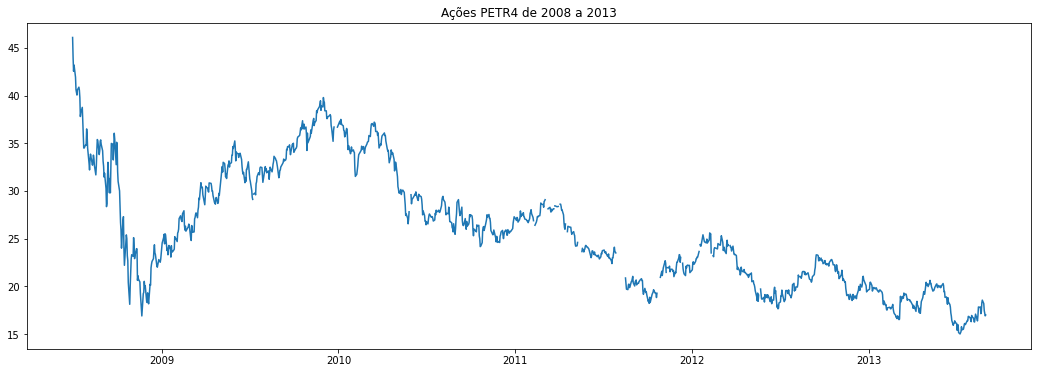

In [10]:
# Primeira plotagem

plt.figure(figsize=(18,6))
plt.title("Ações PETR4 de 2008 a 2013")
plt.plot(corte_hist.index,corte_hist['Close'])
plt.show()

In [11]:
# Há dados faltando, segundo a biblioteca do skit-learn uma boa prática para séries temporais 
#é o preenchimento com valores próximos

corte_hist.fillna(method='ffill',inplace=True) 

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


<Figure size 432x288 with 0 Axes>

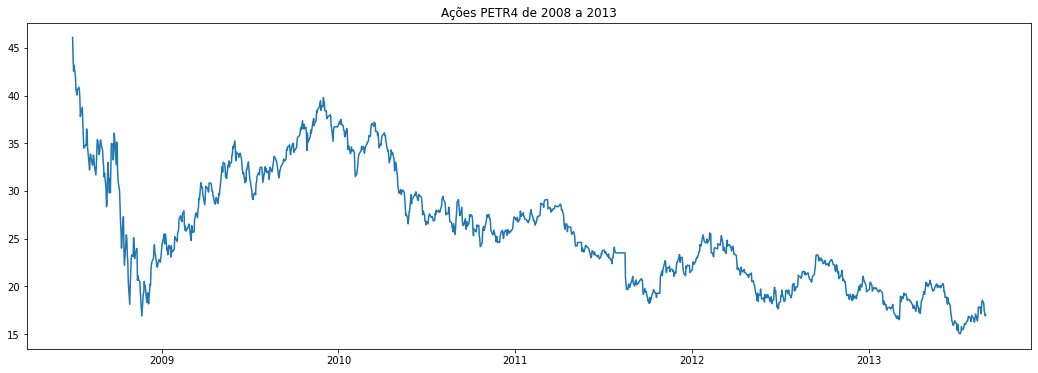

In [12]:
plt.clf()
plt.figure(figsize=(18,6))
plt.title("Ações PETR4 de 2008 a 2013")
plt.plot(corte_hist.index,corte_hist['Close'])
plt.show()

<Figure size 432x288 with 0 Axes>

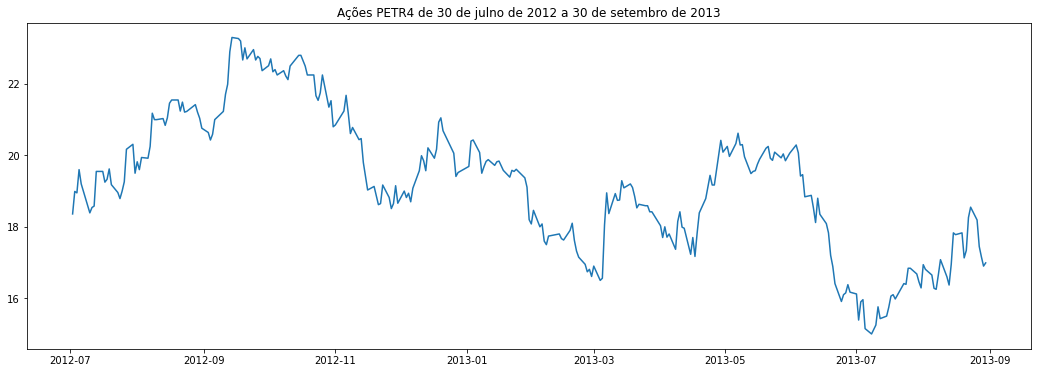

In [13]:
plt.clf()
plt.figure(figsize=(18,6))
plt.title("Ações PETR4 de 30 de julno de 2012 a 30 de setembro de 2013")
plt.plot(corte_hist['Close']['2012-06-30':'2013-09-30'])
plt.show()

<Figure size 432x288 with 0 Axes>

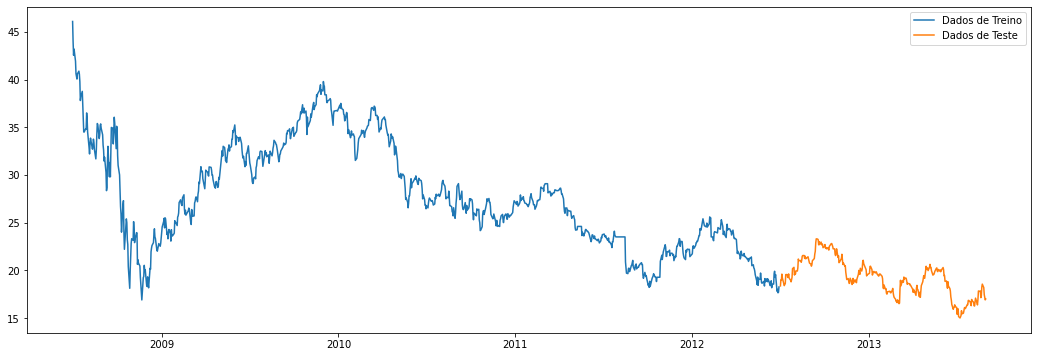

In [14]:
plt.clf()
plt.figure(figsize=(18,6))
#plt.title("Ações PETR4 de 30 de julno de 2012 a 30 de setembro de 2013")
plt.plot(corte_hist['Close'][:'2012-06-30'],label='Dados de Treino')
plt.plot(corte_hist['Close']['2012-06-30':'2013-09-30'],label='Dados de Teste')
plt.legend()
plt.show()

In [15]:
# O autor afirma que usou 80% dos dados para treinamento e 20% para "simulação".

len(corte_hist['Close']['2012-06-30':'2013-09-30'])/len(corte_hist['Close'])

0.22464898595943839

Dados devem agora passar pela normalização ou estandardização para um melhor funionamento da rede.

<Figure size 432x288 with 0 Axes>

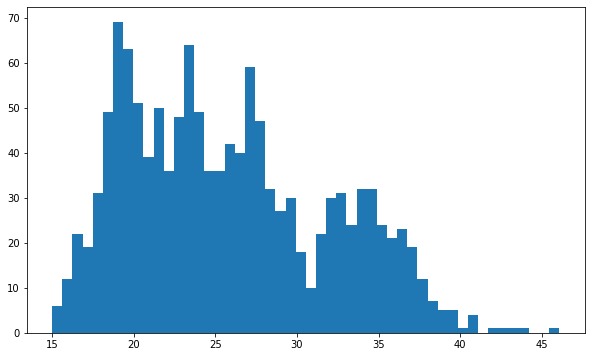

In [16]:
plt.clf()
plt.figure(figsize=(10,6))
#plt.title("Ações PETR4 de 30 de julno de 2012 a 30 de setembro de 2013")
plt.hist(corte_hist['Close'],bins=50)
plt.show()

In [17]:
#Teste Shapiro-Wilk se o valor de p for menor ou igual 0,05 a distribuição não é normal; senão sim. 
from scipy.stats import shapiro

stat, p = shapiro(corte_hist['Close'])
print('Statistics=%.3f, p=%.3f' % (stat, p))


Statistics=0.960, p=0.000


In [18]:
# teste K quadrado de D'Agostino
from scipy.stats import normaltest

stat, p = normaltest(corte_hist['Close'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=105.677, p=0.000


<Figure size 432x288 with 0 Axes>

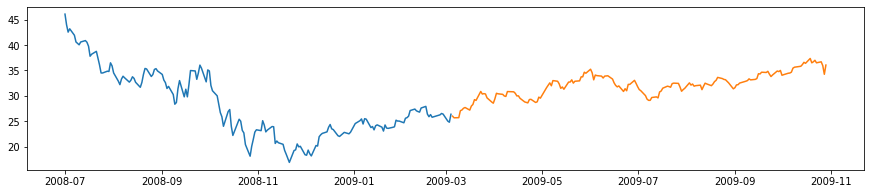

<Figure size 432x288 with 0 Axes>

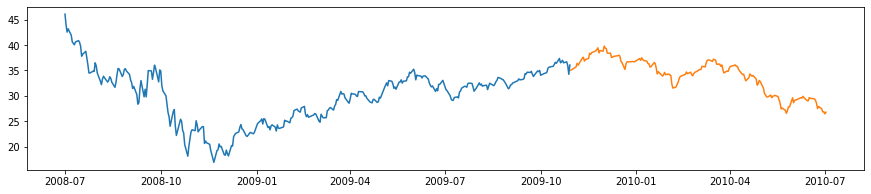

<Figure size 432x288 with 0 Axes>

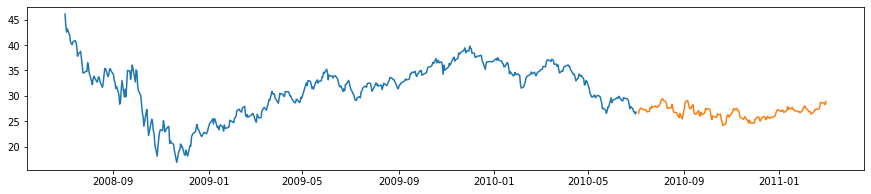

<Figure size 432x288 with 0 Axes>

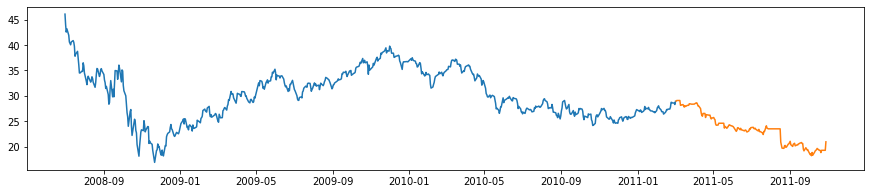

<Figure size 432x288 with 0 Axes>

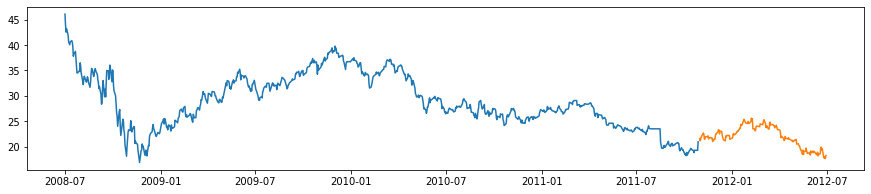

In [19]:
# A a fase de treino os dados serão validade via validação cruzada para séries temporais com mostra Hyndman(2020)

splits = TimeSeriesSplit(n_splits=5)

X = corte_hist['Close'][:'2012-06-30']
for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]
    plt.clf()
    plt.figure(figsize=(15,3))
    plt.plot(train,label='Dados de Treino')
    plt.plot(test,label='Dados de validação')
    plt.show()


In [20]:
# Função que prepara os conjunto de dados com o número de 'lags' necessários e outro conjunto para ser o target

def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [21]:
def normalizador(x):
  x = np.array(x)
  x = x.reshape((x.shape[0],1))

  scaler = MinMaxScaler(feature_range=(-1,1))
  scaler = scaler.fit(x)

  normalized = scaler.transform(x)
  return scaler, normalized

def invert(scaler, normalized):
  inverted = scaler.inverse_transform(normalized)
  return inverted

In [22]:
# Mudanças recomendas por professor Rodrigo

In [23]:
def cria_modelo_complexo2(num_epocas, num_neuronios,X,y, num_camadas,taxa_de_apredizado,loss):
  model = tf.keras.models.Sequential()

  if (num_camadas == 1):
    model.add(tf.keras.layers.LSTM(num_neuronios[0], batch_input_shape=(1, 5, 1), stateful=True))
    model.add(tf.keras.layers.Dense(1))
    model.compile(loss=loss, optimizer=tf.keras.optimizers.SGD(learning_rate=taxa_de_apredizado))  
    for i in range(num_epocas):
      model.fit(X, y, epochs=1, batch_size=1, verbose=0, shuffle=False)
      model.reset_states()
    return model

  else:
    for i in range(num_camadas):
      name = 'layer_lstm_{0}'.format(i+1)
      if (i < num_camadas-2):
        model.add(tf.keras.layers.LSTM(num_neuronios[i], batch_input_shape=(1, 5, 1),return_sequences=True, stateful=True,name=name))
      else:
        model.add(tf.keras.layers.LSTM(num_neuronios[i], batch_input_shape=(1, 5, 1),return_sequences=False, stateful=True,name=name))
        model.add(tf.keras.layers.Dense(1))
        model.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=taxa_de_apredizado))  
        for i in range(num_epocas):
          model.fit(X, y, epochs=1, batch_size=1, verbose=0, shuffle=False)
          model.reset_states()
        return model


In [24]:
# Uma tabela é criada para melhor visualizar e selecionar os melhores modelos após a etapa de treino e validação
modelos = pd.DataFrame(columns=['modelo',
                                'MAE',
                                'RMSE',
                                'Nº de épocas',
                                'Nº camadas',
                                'Nº neur 1',
                                'Nº de neur 2',
                                'Nº de neur 3',
                                'Taxa de apr.',
                                'Loss'])
modelos

,modelo,MAE,RMSE,Nº de épocas,Nº camadas,Nº neur 1,Nº de neur 2,Nº de neur 3,Taxa de apr.,Loss


In [25]:
splits = TimeSeriesSplit(n_splits=5)



seed(0)


for modelo in range(70):

  mae_medio = np.array([])
  rmse_medio = np.array([])

  #Dados de treino, serão dividivos em dois novos conjuntos - treino e validação - por três vezes
  X = corte_hist['Close'][:'2012-06-30']
  
  num_neuronios = [randint(11,150) for i in range(3)]
  num_camadas = randint(1,3)
  taxa_de_apredizado = random()*0.004 + 0.001 
  num_epocas = randint(5,10)
  loss = choice(["mean_squared_error","mean_absolute_error"])


  for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]

    #Normalizando os dados de treino
    scaler_X_train, normalized_X_train = normalizador(train)

    # O conjunto de treino passa a ter lag  e cria-se o conjunto target
    X_train, y_train = split_sequence(normalized_X_train,5)
    #print(X_train.shape)
    

    # Treinamento do modelo
    model = cria_modelo_complexo2(num_epocas, num_neuronios, X_train, y_train, num_camadas,taxa_de_apredizado,loss)

    #Normalizando os dados de teste
    scaler_X_test, normalized_X_test = normalizador(test)

    # O conjunto de test passa a ter lag  e cria-se o conjunto target
    X_test, y_test = split_sequence(normalized_X_test,5)

    # O conjunto de test é remodelado para um tensor 3D
    #print(X_test.shape)
    

    predito = model.predict(X_test,batch_size=1)


    predito_invertido = invert(scaler_X_test, predito)
    y_test_invertido = invert(scaler_X_test, y_test)

    mae = mean_absolute_error(y_test_invertido,predito_invertido )
    rmse = np.sqrt(mean_squared_error(y_test_invertido,predito_invertido ))
    
    mae_medio = np.append(mae_medio,mae)
    rmse_medio = np.append(rmse_medio,rmse)
    #print('Modelo %i MAE %f RMSE %f' %(modelo,mae,rmse))
    

  if (num_camadas==1):
    modelos.loc[len(modelos.index)] = [modelo+1, mae_medio.mean(), rmse_medio.mean(), num_epocas, num_camadas, num_neuronios[0], 0, 0, taxa_de_apredizado, loss]
  elif (num_camadas==2):
    modelos.loc[len(modelos.index)] = [modelo+1, mae_medio.mean(), rmse_medio.mean(), num_epocas, num_camadas, num_neuronios[0], num_neuronios[1], 0, taxa_de_apredizado, loss]
  else:
    modelos.loc[len(modelos.index)] = [modelo+1, mae_medio.mean(), rmse_medio.mean(), num_epocas, num_camadas, num_neuronios[0], num_neuronios[1], num_neuronios[2], taxa_de_apredizado, loss]
  #print(mae_medio,rmse_medio)
    

In [26]:
 modelos

,modelo,MAE,RMSE,Nº de épocas,Nº camadas,Nº neur 1,Nº de neur 2,Nº de neur 3,Taxa de apr.,Loss
0,1,0.960278,1.187792,8,2,109,118,0,0.004862,mean_absolute_error
1,2,1.863186,2.285174,6,3,88,133,102,0.004567,mean_squared_error
2,3,1.630690,2.003881,9,3,83,46,35,0.004198,mean_squared_error
3,4,1.321577,1.655841,9,3,90,36,29,0.002321,mean_squared_error
4,5,2.297266,2.766837,6,3,101,122,91,0.003562,mean_absolute_error
...,...,...,...,...,...,...,...,...,...,...
65,66,0.707840,0.864717,8,2,137,78,0,0.002537,mean_squared_error
66,67,0.760119,0.922191,7,2,52,43,0,0.003918,mean_squared_error
67,68,0.704647,0.887230,9,1,20,0,0,0.002967,mean_squared_error
68,69,0.931877,1.142064,8,1,49,0,0,0.003447,mean_absolute_error


In [27]:
# A mundanças Terminam na célula acima

In [28]:
melhores = modelos.groupby(['MAE','RMSE']).min()
melhores.head()

,,modelo,Nº de épocas,Nº camadas,Nº neur 1,Nº de neur 2,Nº de neur 3,Taxa de apr.,Loss
MAE,RMSE,,,,,,,,
0.597844,0.742150,45,10,2,103,112,0,0.001460,mean_squared_error
0.612021,0.755028,44,9,2,97,20,0,0.001655,mean_absolute_error
0.634587,0.778035,22,5,2,150,119,0,0.001280,mean_absolute_error
0.636293,0.773435,48,8,2,97,98,0,0.001464,mean_absolute_error
0.651653,0.818682,25,7,1,63,0,0,0.002369,mean_squared_error


In [29]:
def mae_e_rmse(modelo_final):

  ''' Esta função returna os valores do MAE, RMSE e os valores preditos e reais(y) após a inversão de normalização'''
  test_data = corte_hist['Close']['2012-06-30':'2013-09-30']
  test_data=np.array(test_data)
  test_data = test_data.reshape((test_data.shape[0],1))

  scaler = MinMaxScaler(feature_range=(-1,1))
  scaler = scaler.fit(test_data)

  normalized_test_data = scaler.transform(test_data)
  normalized_X_test, normalized_y_test = split_sequence(normalized_test_data,5)
  predicted = modelo_final.predict(normalized_X_test,batch_size=1)
  predicted = scaler.inverse_transform(predicted)
  inverted_y_test = scaler.inverse_transform(normalized_y_test)
  mae = mean_absolute_error(predicted, inverted_y_test)
  rmse = np.sqrt(np.mean(predicted - inverted_y_test)**2)

  mae = mean_absolute_error(inverted_y_test, predicted )
  rmse = np.sqrt(mean_absolute_error(inverted_y_test, predicted ))

  return mae, rmse,predicted, inverted_y_test

In [30]:

scaler_X_train, normalized_X_train = normalizador(X)# Conjunto treino com todos os dados

X_train_completo, y_train_completo = split_sequence(normalized_X_train,5)

In [32]:
# Modelo com os melhores hiperparâmetros selecionados e com todos os dados de treino

modelo_final = cria_modelo_complexo2(melhores.iloc[0,1],[melhores.iloc[0,3],melhores.iloc[0,4],melhores.iloc[0,5]],
                                     X_train_completo,y_train_completo, melhores.iloc[0,2],melhores.iloc[0,6],melhores.iloc[0,7])

In [33]:
mae, rmse, predicted, inverted_y_test = mae_e_rmse(modelo_final)
print('MAE %f RMSE %f' %(mae,rmse))

MAE 0.549386 RMSE 0.741206


<Figure size 432x288 with 0 Axes>

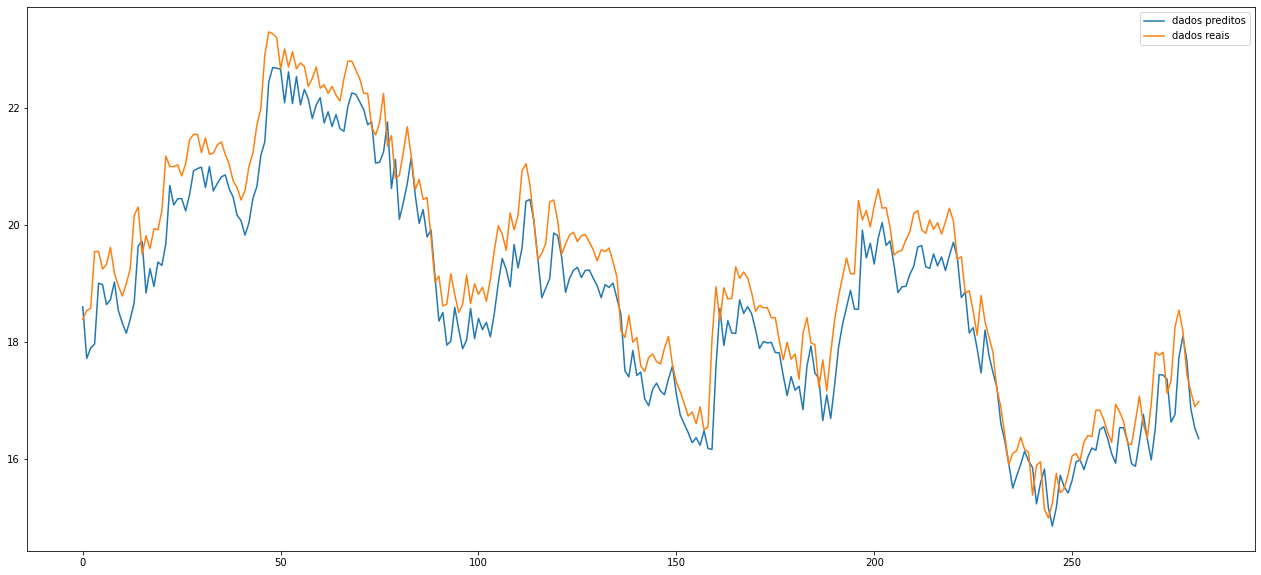

In [34]:
plt.clf()
plt.figure(figsize=(22,10))
plt.plot(predicted, label='dados preditos')
plt.plot(inverted_y_test, label='dados reais')
plt.legend()
plt.show()

In [35]:
# FALTA AGORA VER A TAL MÉDIA E VARIÂNCIA


#Abaixo são os resultados segundo a métrica do autor: diferença da variância do real pela diferença do predito. Após a média das diferenças de variância dos 10 melhores modelos.

In [36]:
print('Variância do real: ',inverted_y_test.var(), 'Variânvia do predito',predicted.var() )

Variância do real:  3.7127192074653736 Variânvia do predito 3.435279


In [37]:
print('Diferença: ',inverted_y_test.var() - predicted.var() )

Diferença:  0.2774403149482838


In [39]:
metricas = pd.DataFrame(columns=['modelo',
                                  'Variância Real',
                                  "Variância Predita",
                                  'Diferença'])

for i in range(10):
  modelo_final = cria_modelo_complexo2(melhores.iloc[i,1],[melhores.iloc[i,3],melhores.iloc[i,4],melhores.iloc[i,5]],
                                     X_train_completo,y_train_completo, melhores.iloc[i,2],melhores.iloc[i,6],melhores.iloc[i,7])
  
  mae, rmse, predicted, inverted_y_test = mae_e_rmse(modelo_final)

  dif = inverted_y_test.var() - predicted.var()
  metricas.loc[len(metricas.index)] = [i+1,inverted_y_test.var(),predicted.var(),dif]

metricas


,modelo,Variância Real,Variância Predita,Diferença
0,1.0,3.712719,3.428286,0.284434
1,2.0,3.712719,2.844689,0.868031
2,3.0,3.712719,2.988983,0.723736
3,4.0,3.712719,3.151158,0.561561
4,5.0,3.712719,3.104853,0.607867
5,6.0,3.712719,3.191998,0.520721
6,7.0,3.712719,3.132777,0.579942
7,8.0,3.712719,3.051089,0.661630
8,9.0,3.712719,3.122978,0.589741
9,10.0,3.712719,3.362405,0.350314


In [40]:
metricas.loc[:,'Diferença'].mean()

0.5747976595756642

In [79]:
splits = TimeSeriesSplit(n_splits=5)

mae_medio = np.array([])
rmse_medio = np.array([])

#Dados de treino, serão dividivos em dois novos conjuntos - treino e validação - por três vezes
X = corte_hist['Close'][:'2012-06-30']

num_neuronios = [randint(11,150) for i in range(3)]
num_camadas = randint(1,3)
taxa_de_apredizado = random()*0.004 + 0.001 
num_epocas = randint(5,10)
loss = choice(["mean_squared_error","mean_absolute_error"])


for train_index, test_index in splits.split(X):
  train = X[train_index]
  test = X[test_index]

  #Normalizando os dados de treino
  scaler_X_train, normalized_X_train = normalizador(train)

  # O conjunto de treino passa a ter lag  e cria-se o conjunto target
  X_train, y_train = split_sequence(normalized_X_train,5)
  #print(X_train.shape)
  

  # Treinamento do modelo
  model = cria_modelo_complexo2(10,[100,50], X_train,y_train, 2,0.001,'mean_squared_error')

  #Normalizando os dados de teste
  scaler_X_test, normalized_X_test = normalizador(test)

  # O conjunto de test passa a ter lag  e cria-se o conjunto target
  X_test, y_test = split_sequence(normalized_X_test,5)

  # O conjunto de test é remodelado para um tensor 3D
  #print(X_test.shape)
  

  predito = model.predict(X_test,batch_size=1)


  predito_invertido = invert(scaler_X_test, predito)
  y_test_invertido = invert(scaler_X_test, y_test)

  mae = mean_absolute_error(y_test_invertido,predito_invertido )
  rmse = np.sqrt(mean_squared_error(y_test_invertido,predito_invertido ))
  
  mae_medio = np.append(mae_medio,mae)
  rmse_medio = np.append(rmse_medio,rmse)
  #print('Modelo %i MAE %f RMSE %f' %(modelo,mae,rmse))
  

if (num_camadas==1):
  modelos.loc[len(modelos.index)] = [modelo+1, mae_medio.mean(), rmse_medio.mean(), num_epocas, num_camadas, num_neuronios[0], 0, 0, taxa_de_apredizado, loss]
elif (num_camadas==2):
  modelos.loc[len(modelos.index)] = [modelo+1, mae_medio.mean(), rmse_medio.mean(), num_epocas, num_camadas, num_neuronios[0], num_neuronios[1], 0, taxa_de_apredizado, loss]
else:
  modelos.loc[len(modelos.index)] = [modelo+1, mae_medio.mean(), rmse_medio.mean(), num_epocas, num_camadas, num_neuronios[0], num_neuronios[1], num_neuronios[2], taxa_de_apredizado, loss]
#print(mae_medio,rmse_medio)

In [80]:
print(mae_medio.var())
print(rmse_medio.var())

0.0189525353387529
0.034197981567590796


##Hiperparâmetros escolhidos de modo não-aleatório

In [107]:
#cria_modelo_complexo2(num_epocas, num_neuronios,X,y, num_camadas,taxa_de_apredizado,loss):

modelo_final = cria_modelo_complexo2(10,[100,50], X_train_completo,y_train_completo, 2,0.001,'mean_squared_error')

mae, rmse, predicted, inverted_y_test = mae_e_rmse(modelo_final)
print('MAE %f RMSE %f' %(mae,rmse))

MAE 0.452185 RMSE 0.672447


In [108]:
print('Variância do real: ',inverted_y_test.var(), 'Variânvia do predito',predicted.var() )
print('Diferença: ',inverted_y_test.var() - predicted.var() )

Variância do real:  3.7127192074653736 Variânvia do predito 3.7112398
Diferença:  0.0014793927070728685


In [109]:
#10 epocas, 2 camadas, 100 e 50
#Variância do real:  3.7127192074653736 Variânvia do predito 3.7112398
#Diferença:  0.0014793927070728685


<Figure size 432x288 with 0 Axes>

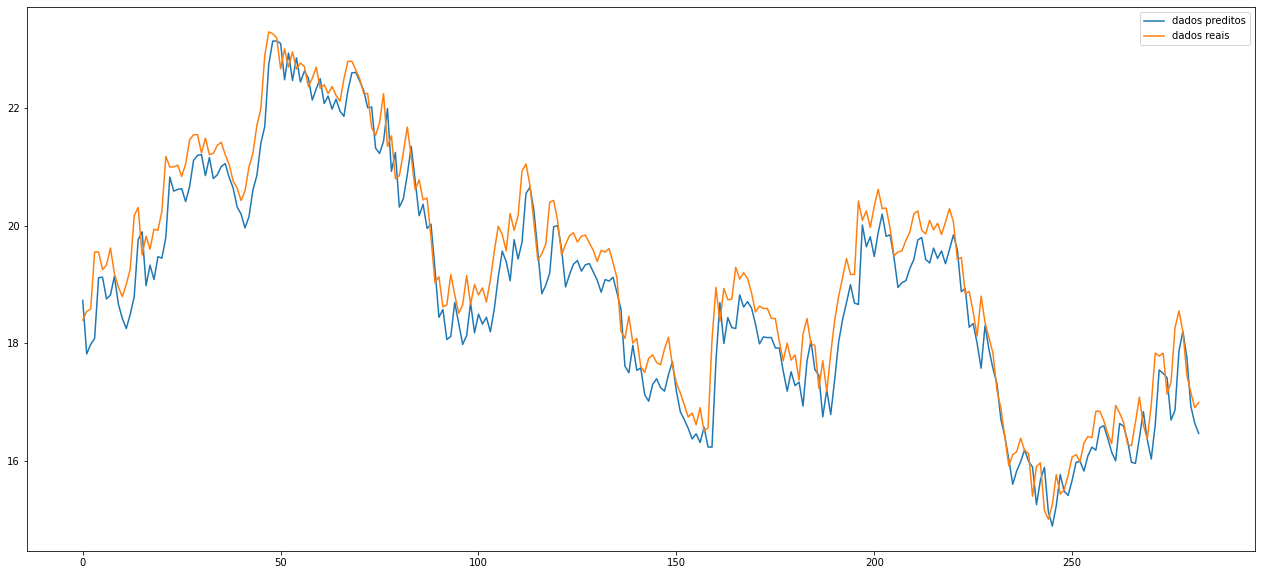

In [110]:
plt.clf()
plt.figure(figsize=(22,10))
plt.plot(predicted, label='dados preditos')
plt.plot(inverted_y_test, label='dados reais')
plt.legend()
plt.show()

In [74]:
modelo_final = cria_modelo_complexo2(10,[103,112], X_train_completo,y_train_completo, 2,0.001460,'mean_squared_error')

mae, rmse, predicted, inverted_y_test = mae_e_rmse(modelo_final)
print('MAE %f RMSE %f' %(mae,rmse))

MAE 0.542649 RMSE 0.736647


In [75]:
print('Variância do real: ',inverted_y_test.var(), 'Variânvia do predito',predicted.var() )
print('Diferença: ',inverted_y_test.var() - predicted.var() )

Variância do real:  3.7127192074653736 Variânvia do predito 3.4684894
Diferença:  0.24422979897233166
